In [21]:
from task8module.task8module import *
import numpy as np
from typing import List
import copy

In [23]:
weights = [10., 20., 30., 50., 100., 300.]

In [24]:
np.random.seed(42)
n = 5
Madj = generate_from_n_full_weighted_directed_graph(n, weights)
Madj

array([[  0.,  50.,   0.,   0.,   0.],
       [  0.,   0., 100.,  20.,   0.],
       [ 30.,   0.,   0.,  30.,  30.],
       [100.,   0.,   0.,   0.,   0.],
       [100.,  30.,   0., 100.,   0.]])

In [25]:
Madj_with_inf = copy.deepcopy(Madj)
for i in range(n):
    for j in range(n):
        if Madj[i,j] == 0. and i != j:
            Madj_with_inf[i,j] = float("Inf")

In [26]:
Madj_with_inf

array([[  0.,  50.,  inf,  inf,  inf],
       [ inf,   0., 100.,  20.,  inf],
       [ 30.,  inf,   0.,  30.,  30.],
       [100.,  inf,  inf,   0.,  inf],
       [100.,  30.,  inf, 100.,   0.]])

In [27]:
Madj_with_inf.tolist()

[[0.0, 50.0, inf, inf, inf],
 [inf, 0.0, 100.0, 20.0, inf],
 [30.0, inf, 0.0, 30.0, 30.0],
 [100.0, inf, inf, 0.0, inf],
 [100.0, 30.0, inf, 100.0, 0.0]]

In [29]:
improved_all_pairs_shortest_paths(Madj_with_inf.tolist())

[[0, 50.0, 150.0, 70.0, 180.0],
 [120.0, 0, 100.0, 20.0, 130.0],
 [30.0, 60.0, 0, 30.0, 30.0],
 [100.0, 150.0, 250.0, 0, 280.0],
 [100.0, 30.0, 130.0, 50.0, 0]]

{(0, 1): Text(0.654508476093664, 0.47552828417802706, '50.0'),
 (1, 2): Text(-0.25000005215406573, 0.7694209149307285, '100.0'),
 (1, 3): Text(-0.25000002235174246, 0.18163562362300228, '20.0'),
 (2, 0): Text(0.09549147175227024, 0.2938926307527015, '30.0'),
 (2, 3): Text(-0.8090170266931362, -2.980232327587373e-08, '30.0'),
 (2, 4): Text(-0.24999997764825752, -0.18163562362300228, '30.0'),
 (3, 0): Text(0.09549150155459352, -0.2938926605550248, '100.0'),
 (4, 0): Text(0.6545085505994722, -0.4755282543757038, '100.0'),
 (4, 1): Text(0.3090170266931363, 2.980232327587373e-08, '30.0'),
 (4, 3): Text(-0.24999994784593424, -0.7694209149307285, '100.0')}

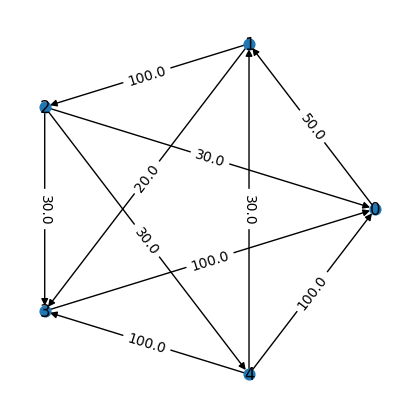

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.from_numpy_matrix(Madj, create_using=nx.DiGraph)
np.random.seed(429)
plt.figure(figsize=(4, 4))
nx.draw(g, node_size = 60, pos = nx.circular_layout(g),  with_labels = True )
labels = nx.get_edge_attributes(g,'weight')
nx.draw_networkx_edge_labels(g,pos = nx.circular_layout(g),edge_labels=labels)